In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://www.dropbox.com/s/5721wcs2guuykzl/stacksample.zip?dl=0


--2020-07-25 17:35:27--  https://www.dropbox.com/s/5721wcs2guuykzl/stacksample.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/5721wcs2guuykzl/stacksample.zip [following]
--2020-07-25 17:35:27--  https://www.dropbox.com/s/raw/5721wcs2guuykzl/stacksample.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3a538ab88ecb7bea1a0dc0604b.dl.dropboxusercontent.com/cd/0/inline/A8PI50KmyGgfUzlYPwfijR-ffANwgF-__2CoxMgJZXl3hhIYeE_crHvlvTQ48wYqh4rn_X3Bg4M7_5F0fCxZUJJXZwTOARNDefLKeewsLgqIjQ/file# [following]
--2020-07-25 17:35:27--  https://uc3a538ab88ecb7bea1a0dc0604b.dl.dropboxusercontent.com/cd/0/inline/A8PI50KmyGgfUzlYPwfijR-ffANwgF-__2CoxMgJZXl3hhIYeE_crHvlvTQ48wYqh4rn_X3Bg4M7_5F0fCxZUJJXZwTOARNDefLKeewsLgqIjQ/file
Resol

In [ ]:
!unzip '/content/stacksample.zip?dl=0'


Archive:  /content/stacksample.zip?dl=0
  inflating: Answers.csv             
  inflating: Questions.csv           
  inflating: Tags.csv                


In [ ]:

questions = r'Questions.csv'
answers = r'Answers.csv'
tags = r'Tags.csv'

In [ ]:
ques = pd.read_csv('Questions.csv',encoding='iso-8859-1')
ques.head(10)


,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
5,330,63.0,2008-08-02T02:51:36Z,NaN,29,Should I use nested classes in this case?,<p>I am working on a collection of classes use...
6,470,71.0,2008-08-02T15:11:47Z,2016-03-26T05:23:29Z,13,Homegrown consumption of web services,<p>I've been writing a few web services for a ...
7,580,91.0,2008-08-02T23:30:59Z,NaN,21,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...
8,650,143.0,2008-08-03T11:12:52Z,NaN,79,Automatically update version number,<p>I would like the version property of my app...
9,810,233.0,2008-08-03T20:35:01Z,NaN,9,Visual Studio Setup Project - Per User Registr...,<p>I'm trying to maintain a Setup Project in <...


In [ ]:
ques.drop(["OwnerUserId","CreationDate","ClosedDate","Score"], axis=1, inplace=True)
ques.head(10)

,Id,Title,Body
0,80,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
5,330,Should I use nested classes in this case?,<p>I am working on a collection of classes use...
6,470,Homegrown consumption of web services,<p>I've been writing a few web services for a ...
7,580,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...
8,650,Automatically update version number,<p>I would like the version property of my app...
9,810,Visual Studio Setup Project - Per User Registr...,<p>I'm trying to maintain a Setup Project in <...


In [ ]:
import re 

def rem_html_tags(body):
    regex = re.compile('<.*?>')
    return re.sub(regex, '', body)

In [ ]:
ques['Body'] = ques['Body'].apply(rem_html_tags)
ques.head()

,Id,Title,Body
0,80,SQLStatement.execute() - multiple queries in o...,I've written a database generation script in S...
1,90,Good branching and merging tutorials for Torto...,Are there any really good tutorials explaining...
2,120,ASP.NET Site Maps,Has anyone got experience creating SQL-based A...
3,180,Function for creating color wheels,This is something I've pseudo-solved many time...
4,260,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...


In [ ]:
ques.to_csv('question_clean.csv',index=False)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
%matplotlib inline

import collections

In [ ]:
df_tags = pd.read_csv('Tags.csv', encoding='iso-8859-1')

In [ ]:
def plot_tags(tagCount):
    
    x,y = zip(*tagCount)

    colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
    colors = [colormap(i) for i in np.linspace(0, 0.8,50)]   

    area = [i/4000 for i in list(y)]   # 0 to 15 point radiuses
    plt.figure(figsize=(9,8))
    plt.ylabel("Number of question associations")
    for i in range(len(y)):
        plt.plot(i,y[i], marker='o', linestyle='',ms=area[i],label=x[i])

    plt.legend(numpoints=1)
    plt.show()

[('javascript', 124155), ('java', 115212), ('c#', 101186), ('php', 98808), ('android', 90659), ('jquery', 78542), ('python', 64601), ('html', 58976), ('c++', 47591), ('ios', 47009)]


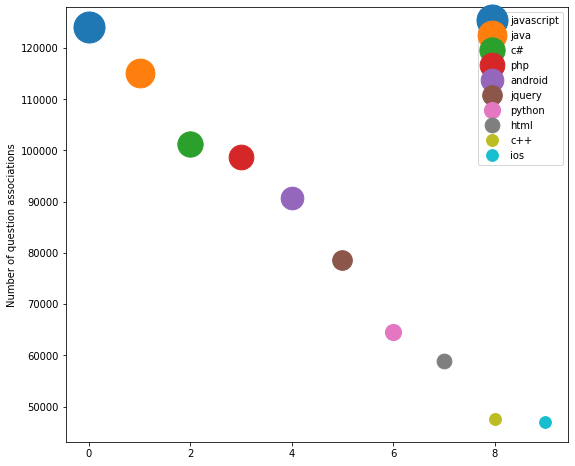

In [ ]:
tagCount =  collections.Counter(list(df_tags['Tag'])).most_common(10)
print(tagCount)
plot_tags(tagCount)

In [ ]:
top10=['javascript','java','c#','php','android','jquery','python','html','c++','ios']


In [ ]:
tag_top10= df_tags[df_tags.Tag.isin(top10)]
print (tag_top10.shape)
tag_top10.head()

(826739, 2)


,Id,Tag
14,260,c#
18,330,c++
28,650,c#
35,930,c#
39,1010,c#


In [ ]:
tag_top10['Id'].value_counts().head(10)

30798790    5
31085960    5
11648170    5
35318730    5
4009250     5
30289880    5
23267320    5
35283570    5
30991580    5
23484760    5
Name: Id, dtype: int64

In [ ]:

tag_top10.head()


,Id,Tag
14,260,c#
18,330,c++
28,650,c#
35,930,c#
39,1010,c#


In [ ]:
def add_tags(question_id):
    return tag_top10[tag_top10['Id'] == question_id['Id']].Tag.values

top10 = tag_top10.apply(add_tags, axis=1)

In [ ]:
                            len(top10),tag_top10.shape


(826739, (826739, 2))

In [ ]:

tag_top10=pd.concat([tag_top10, top10.rename('Tags')], axis=1)
tag_top10.head()

,Id,Tag,Tags
14,260,c#,[c#]
18,330,c++,[c++]
28,650,c#,[c#]
35,930,c#,[c#]
39,1010,c#,[c#]


In [ ]:
tag_top10.drop(["Tag"], axis=1, inplace=True)
tag_top10.shape

(826739, 2)

In [ ]:
top10_tags=tag_top10.loc[tag_top10.astype(str).drop_duplicates().index]

In [ ]:

ques = pd.read_csv('question_clean.csv', encoding='iso-8859-1')
ques.head()

,Id,Title,Body
0,80,SQLStatement.execute() - multiple queries in o...,I've written a database generation script in S...
1,90,Good branching and merging tutorials for Torto...,Are there any really good tutorials explaining...
2,120,ASP.NET Site Maps,Has anyone got experience creating SQL-based A...
3,180,Function for creating color wheels,This is something I've pseudo-solved many time...
4,260,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...


In [ ]:
total=pd.merge(ques, top10_tags, on='Id')
print(total.shape)
total.head()

(13442, 4)


,Id,Title,Body,Tags
0,260,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...,[c#]
1,330,Should I use nested classes in this case?,I am working on a collection of classes used f...,[c++]
2,650,Automatically update version number,I would like the version property of my applic...,[c#]
3,930,How do I connect to a database and loop over a...,What's the simplest way to connect and query a...,[c#]
4,1010,"How to get the value of built, encoded ViewState?",I need to grab the base64-encoded representati...,[c#]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from nltk import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, BatchNormalization, GRU ,concatenate
from keras.models import Model

Using TensorFlow backend.


In [ ]:
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(total.Tags)
labels = multilabel_binarizer.classes_
labels

array(['android', 'c#', 'c++', 'html', 'ios', 'java', 'javascript',
       'jquery', 'php', 'python'], dtype=object)

In [ ]:
train,test=train_test_split(total[:550000],test_size=0.25,random_state=24)


In [ ]:
train.shape,test.shape


((10081, 4), (3361, 4))

In [ ]:

X_train_t=train['Title']
X_train_b=train['Body']
y_train=multilabel_binarizer.transform(train['Tags'])
X_test_t=test['Title']
X_test_b=test['Body']
y_test=multilabel_binarizer.transform(test['Tags'])

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install word_tokenizer
!pip unstall word_tokenizer

ERROR: unknown command "unstall" - maybe you meant "uninstall"


In [ ]:
sent_lens_t=[]
for sent in train['Title']:
    sent_lens_t.append(len(word_tokenize(sent)))
max(sent_lens_t)

33

In [ ]:
np.quantile(sent_lens_t,0.97)

18.0

In [ ]:
max_len_t = 18
tok = Tokenizer(char_level=False,split=' ')
tok.fit_on_texts(X_train_t)
sequences_train_t = tok.texts_to_sequences(X_train_t)

In [ ]:


vocab_len_t=len(tok.index_word.keys())
vocab_len_t

7923

In [ ]:
sequences_matrix_train_t = sequence.pad_sequences(sequences_train_t,maxlen=max_len_t)
sequences_matrix_train_t

array([[   0,    0,    0, ...,   13,   35,  849],
       [   0,    0,    0, ...,   33,    8,  136],
       [   0,    0,    0, ..., 3909,   15,  121],
       ...,
       [   0,    0,    0, ...,    0,   24, 1646],
       [   0,    0,    0, ...,    3,   17,   83],
       [   0,    0,    0, ...,    5,  141,  201]], dtype=int32)

In [ ]:
sequences_test_t = tok.texts_to_sequences(X_test_t)
sequences_matrix_test_t = sequence.pad_sequences(sequences_test_t,maxlen=max_len_t)

In [ ]:
sequences_matrix_train_t.shape,sequences_matrix_test_t.shape,y_train.shape,y_test.shape


((10081, 18), (3361, 18), (10081, 10), (3361, 10))

In [ ]:
sent_lens_b=[]
for sent in train['Body']:
    sent_lens_b.append(len(word_tokenize(sent)))
max(sent_lens_b)

4991

In [ ]:

np.quantile(sent_lens_b,0.90)

356.0

In [ ]:

max_len_b = 600
tok = Tokenizer(char_level=False,split=' ')
tok.fit_on_texts(X_train_b)
sequences_train_b = tok.texts_to_sequences(X_train_b)

In [ ]:
vocab_len_b =len(tok.index_word.keys())
vocab_len_b

51377

In [ ]:
sequences_matrix_train_b = sequence.pad_sequences(sequences_train_b,maxlen=max_len_b)
sequences_matrix_train_b

array([[   0,    0,    0, ..., 4177,  158,  103],
       [   0,    0,    0, ...,  381,   44, 1587],
       [   0,    0,    0, ...,   18,  835,  103],
       ...,
       [   0,    0,    0, ...,  103,    9,  471],
       [   0,    0,    0, ...,  101,   36,   10],
       [   0,    0,    0, ...,  168,    7,  534]], dtype=int32)

In [ ]:
sequences_test_b = tok.texts_to_sequences(X_test_b)
sequences_matrix_test_b = sequence.pad_sequences(sequences_test_b,maxlen=max_len_b)

In [ ]:
sequences_matrix_train_t.shape,sequences_matrix_train_b.shape,y_train.shape

((10081, 18), (10081, 600), (10081, 10))

In [ ]:
sequences_matrix_test_t.shape,sequences_matrix_test_b.shape,y_test.shape

((3361, 18), (3361, 600), (3361, 10))

In [ ]:

def RNN():
  
    title_input = Input(name='title_input',shape=[max_len_t])
    title_Embed = Embedding(vocab_len_t+1,2000,input_length=max_len_t,mask_zero=True,name='title_Embed')(title_input)
    gru_out_t = GRU(300)(title_Embed)
    # auxiliary output to tune GRU weights smoothly 
    auxiliary_output = Dense(10, activation='sigmoid', name='aux_output')(gru_out_t)   
    
  
    body_input = Input(name='body_input',shape=[max_len_b]) 
    body_Embed = Embedding(vocab_len_b+1,170,input_length=max_len_b,mask_zero=True,name='body_Embed')(body_input)
    gru_out_b = GRU(200)(body_Embed)
    
    # combined with GRU output
    com = concatenate([gru_out_t, gru_out_b])
    
    # combined data is being fed to dense layers
    dense1 = Dense(400,activation='relu')(com)
    dp1 = Dropout(0.5)(dense1)
    bn = BatchNormalization()(dp1) 
    dense2 = Dense(150,activation='relu')(bn)
    
    main_output = Dense(10, activation='sigmoid', name='main_output')(dense2)
    
    model = Model(inputs=[title_input, body_input],outputs=[main_output, auxiliary_output])
    return model

In [ ]:
model = RNN()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title_input (InputLayer)        (None, 18)           0                                            
__________________________________________________________________________________________________
body_input (InputLayer)         (None, 600)          0                                            
__________________________________________________________________________________________________
title_Embed (Embedding)         (None, 18, 2000)     15848000    title_input[0][0]                
__________________________________________________________________________________________________
body_Embed (Embedding)          (None, 600, 170)     8734260     body_input[0][0]                 
____________________________________________________________________________________________

In [ ]:
model.compile(optimizer='adam',loss={'main_output': 'categorical_crossentropy', 'aux_output': 'categorical_crossentropy'},
              metrics=['accuracy'])

In [ ]:

results=model.fit({'title_input': sequences_matrix_train_t, 'body_input': sequences_matrix_train_b},
          {'main_output': y_train, 'aux_output': y_train},
          validation_data=[{'title_input': sequences_matrix_test_t, 'body_input': sequences_matrix_test_b},
          {'main_output': y_test, 'aux_output': y_test}],
          epochs=5, batch_size=800)

Train on 10081 samples, validate on 3361 samples
Epoch 1/5
10081/10081 [==============================] - 398s 40ms/step - loss: 4.6958 - main_output_loss: 2.2084 - aux_output_loss: 2.4731 - main_output_accuracy: 0.3637 - aux_output_accuracy: 0.3352 - val_loss: 4.8401 - val_main_output_loss: 2.4061 - val_aux_output_loss: 2.4275 - val_main_output_accuracy: 0.4978 - val_aux_output_accuracy: 0.4400
Epoch 2/5
10081/10081 [==============================] - 379s 38ms/step - loss: 3.7168 - main_output_loss: 1.4478 - aux_output_loss: 2.2524 - main_output_accuracy: 0.6357 - aux_output_accuracy: 0.4984 - val_loss: 4.0118 - val_main_output_loss: 1.9394 - val_aux_output_loss: 2.0594 - val_main_output_accuracy: 0.5724 - val_aux_output_accuracy: 0.5138
Epoch 3/5
10081/10081 [==============================] - 375s 37ms/step - loss: 2.7199 - main_output_loss: 0.9430 - aux_output_loss: 1.7723 - main_output_accuracy: 0.6822 - aux_output_accuracy: 0.5427 - val_loss: 3.2615 - val_main_output_loss: 1.5886 

In [ ]:
   (predicted_main, predicted_aux)=model.predict({'title_input': sequences_matrix_test_t, 'body_input': sequences_matrix_test_b},verbose=1)


3361/3361 [==============================] - 53s 16ms/step


In [ ]:
from sklearn.metrics import classification_report,f1_score


In [ ]:
print(f1_score(y_test,predicted_main>.55,average='samples'))


0.6673609044927105


In [ ]:
print(classification_report(y_test,predicted_main>.55))


              precision    recall  f1-score   support

           0       1.00      0.53      0.69        32
           1       0.59      0.80      0.68      1040
           2       0.58      0.63      0.60       396
           3       0.90      0.24      0.38       223
           4       0.00      0.00      0.00        10
           5       0.69      0.76      0.72       573
           6       0.56      0.74      0.64       447
           7       0.71      0.77      0.74       284
           8       0.78      0.70      0.74       406
           9       0.75      0.69      0.72       289

   micro avg       0.64      0.71      0.67      3700
   macro avg       0.65      0.59      0.59      3700
weighted avg       0.66      0.71      0.67      3700
 samples avg       0.65      0.72      0.67      3700



In [ ]:
test.iloc[24]


Id                                                  482560
Title    Can you tell on runtime if you're running java...
Body     I have an application that some of my users ru...
Tags                                                [java]
Name: 2773, dtype: object

In [ ]:
predicted_main[24].round(decimals = 2)


array([0.03, 0.01, 0.01, 0.  , 0.01, 1.  , 0.05, 0.  , 0.  , 0.  ],
      dtype=float32)

In [ ]:
labels


array(['android', 'c#', 'c++', 'html', 'ios', 'java', 'javascript',
       'jquery', 'php', 'python'], dtype=object)

In [ ]:
model.save('e:\d1\stackoverflow_tags.csv')